# Exploratory Analysis & Sector Correlation Studies

## 1. Import Packages and Setup Config

In [1]:
import sqlite3
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Config
DB_PATH = "../data/data.db"
PRICES_CSV = "../data/processed/prices_monthly.csv"
FEATURES_CSV = "../data/processed/features_monthly.csv"
MACRO_CSV = "../data/processed/macro_monthly.csv"

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True

## 2. Load Data

In [2]:
def read_table(db_path: str, table: str, csv_fallback: str) -> pd.DataFrame:
    try:
        with sqlite3.connect(db_path) as conn:
            df = (pd.read_sql(f"SELECT * FROM {table}", conn, parse_dates=["date"])
                    .set_index("date")
                    .sort_index())
        print(f"Loaded '{table}' from SQLite DB at: {db_path}")
        return df
    except Exception as e:
        print(f"SQLite load failed for '{table}' ({e}); trying CSV fallback: {csv_fallback}")
        df = (pd.read_csv(csv_fallback, parse_dates=["date"])
                .set_index("date")
                .sort_index())
        print(f"Loaded '{table}' from CSV file at: {csv_fallback}")
        return df

prices = read_table(DB_PATH, "prices_monthly", PRICES_CSV)
features = read_table(DB_PATH, "features_monthly", FEATURES_CSV)
macro = read_table(DB_PATH, "macro_monthly", MACRO_CSV)

prices.head(), features.head(), macro.head()


Loaded 'prices_monthly' from SQLite DB at: ../data/data.db
Loaded 'features_monthly' from SQLite DB at: ../data/data.db
Loaded 'macro_monthly' from SQLite DB at: ../data/data.db


(                 XLF        XLK        XLE        XLV        XLI        XLP  \
 date                                                                          
 2010-01-31  8.706629  16.942179  32.489189  23.933504  20.354628  17.178883   
 2010-02-28  9.013634  17.532240  33.466835  24.025322  21.440018  17.723101   
 2010-03-31  9.815742  18.731411  34.409565  24.666168  23.303787  18.390799   
 2010-04-30  9.944981  18.966564  35.839306  23.706551  24.295919  18.193264   
 2010-05-31  9.034181  17.547516  31.735521  22.163467  22.080412  17.350435   
 
                   XLY        XLB        XLU        SPY  
 date                                                    
 2010-01-31  23.817570  21.497133  17.131315  80.809425  
 2010-02-28  25.143976  22.467144  16.905060  83.330254  
 2010-03-31  27.106936  24.245686  17.359900  88.403381  
 2010-04-30  28.741264  24.295719  17.816444  89.771004  
 2010-05-31  26.718983  21.979795  16.833138  82.638275  ,
              XLF_r1m   XLK_r1m

## 3. Monthly Return by Sector

,count,mean,std,min,25%,50%,75%,max
XLF,180.0,0.0114,0.0550,-0.2104,-0.0238,0.0206,0.0478,0.1685
XLK,180.0,0.0158,0.0504,-0.1197,-0.0150,0.0186,0.0478,0.1374
XLE,180.0,0.0086,0.0779,-0.3437,-0.0303,0.0137,0.0451,0.3076
XLV,180.0,0.0108,0.0391,-0.0935,-0.0163,0.0128,0.0380,0.1259
XLI,180.0,0.0120,0.0520,-0.1863,-0.0165,0.0119,0.0422,0.1603
XLP,180.0,0.0091,0.0346,-0.0891,-0.0139,0.0131,0.0319,0.1045
XLY,180.0,0.0141,0.0536,-0.1491,-0.0131,0.0132,0.0448,0.1888
XLB,180.0,0.0094,0.0555,-0.1648,-0.0240,0.0115,0.0423,0.1734
XLU,180.0,0.0092,0.0412,-0.1128,-0.0174,0.0129,0.0377,0.1055
SPY,180.0,0.0120,0.0419,-0.1249,-0.0134,0.0178,0.0370,0.1270


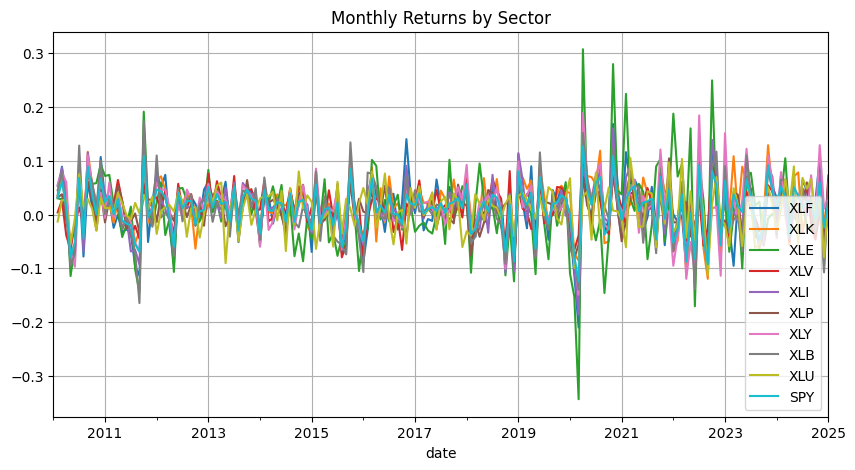

In [3]:
# Monthly Return by Sector
returns = prices.pct_change()
display(returns.describe().T.round(4))
# Plot a subset (or all) of sector return series
returns.plot(title="Monthly Returns by Sector")
plt.show()

The plot shows that most U.S. sector ETFs move closely together, indicating strong market-wide correlation driven by common factors. Defensive sectors such as XLU and Consumer Staples (XLP) exhibit the smallest fluctuations, while cyclical sectors like Energy (XLE) and Technology (XLK) show larger swings, reflecting higher sensitivity to macroeconomic changes. 

The sharp drop and rebound around 2020 correspond to the COVID-19 crash and recovery, while the increased amplitude of returns after 2021 highlights the volatility during the inflation and rate-hike period. 

Overall, SPY tracks near the sector average, confirming its role as the broad market benchmark.

## 4. Sector Correlation

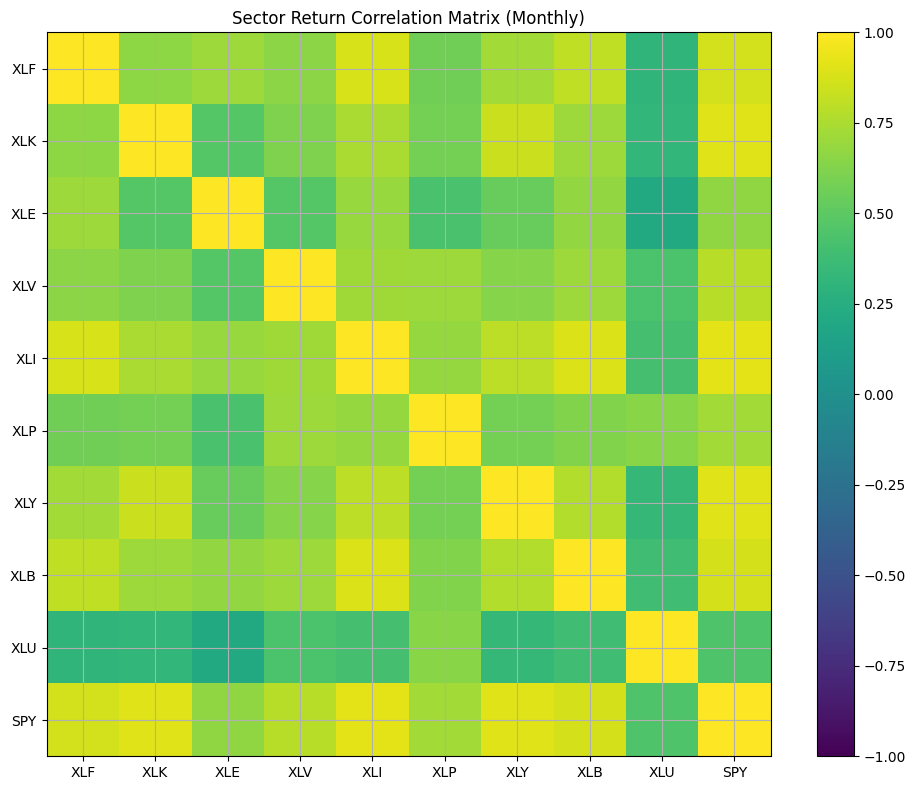

In [4]:
corr = returns.corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr.values, vmin=-1, vmax=1)
ax.set_title("Sector Return Correlation Matrix (Monthly)")
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.index)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

This correlation matrix shows that nearly all sectors have strong positive correlations with each other, generally ranging between 0.5 and 0.9, which reflects the broad market’s tendency to move in unison. 

The bright yellow cells along the off-diagonal indicate particularly high correlations (e.g., between Technology （XLK）, Consumer Discretionary [XLY], and Financials [XLF]), all of which are cyclical sectors that respond similarly to economic growth. Conversely, cooler green-blueareas such as those involving Energy [XLE] or Utilities [XLU] indicate weaker correlations, suggesting these sectors behave somewhat independently—Energy often diverges due to commodity price shocks, and Utilities act as a defensive hedge. 

SPY, as expected, is highly correlated with all sectors since it represents the aggregate market. Overall, the matrix confirms that sector performance is heavily synchronized, with only a few defensive or commodity-linked exceptions providing diversification.